In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
#from ImageDataset import ImageDataset
from image_dataset import ImageDataset
from torch import nn
import torch

# Set the path to the folder containing your unlabeled images
train_path = "data/DIV2K/train"
test_path = "data/DIV2K/valid"

# Define the transformation to be applied to each image
transform = transforms.Compose([
    #transforms.Resize((256, 256)),  # Resize the image to a fixed size
    transforms.RandomCrop((512,512)),
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomRotation(45),
    transforms.ToTensor()  # Convert the image to a tensor
])

# Create the ImageFolder dataset
train_data = ImageDataset(train_path, transform=transform)

test_data = ImageDataset(test_path, transform=transform)

In [2]:
from torch.utils.data import DataLoader
train_data_loader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_data_loader = DataLoader(dataset=test_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

In [3]:
#img, label = train_data[0][0], train_data[0][1]
img = train_data[0]
#class_names = train_data.classes
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"img range = [{torch.min(img)}, {torch.max(img)}]")
#print(f"Image label: {label}")
#print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.4235, 0.4667, 0.4588,  ..., 0.2745, 0.2667, 0.3020],
         [0.4549, 0.4784, 0.4706,  ..., 0.2863, 0.2510, 0.2863],
         [0.5059, 0.4863, 0.4745,  ..., 0.2941, 0.2863, 0.2784],
         ...,
         [0.9020, 0.9333, 0.8980,  ..., 0.0902, 0.0980, 0.1137],
         [0.9294, 0.9451, 0.9020,  ..., 0.1020, 0.1059, 0.1059],
         [0.9451, 0.9412, 0.9059,  ..., 0.1020, 0.1020, 0.1020]],

        [[0.3569, 0.3961, 0.3882,  ..., 0.1961, 0.1922, 0.2196],
         [0.3843, 0.4078, 0.4000,  ..., 0.2039, 0.1647, 0.1961],
         [0.4353, 0.4157, 0.4000,  ..., 0.2157, 0.1882, 0.1765],
         ...,
         [0.7882, 0.8157, 0.7725,  ..., 0.0549, 0.0627, 0.0784],
         [0.8863, 0.9098, 0.8392,  ..., 0.0588, 0.0549, 0.0627],
         [0.9333, 0.9490, 0.8902,  ..., 0.0588, 0.0549, 0.0588]],

        [[0.3294, 0.3882, 0.3882,  ..., 0.2196, 0.1804, 0.1686],
         [0.3529, 0.3922, 0.3922,  ..., 0.2275, 0.1647, 0.1765],
         [0.4039, 0.3961, 0.3804,  ..., 0.21

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

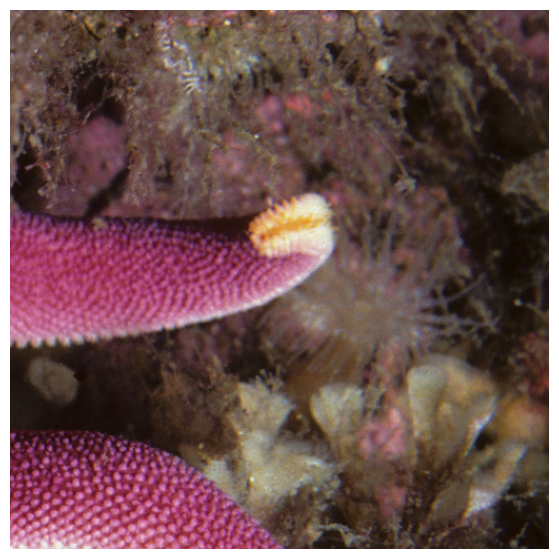

In [4]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
#plt.title(class_names[label], fontsize=14)

In [5]:
next(iter(train_data_loader)).shape

torch.Size([8, 3, 512, 512])

In [6]:
from pathlib import Path
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "autoencoder_upsampler_res_blocks_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [7]:
#from autoencoder_upscale_model import AutoencoderUpscaleModel
import torch
from residual_upsampler_2 import ResidualUpsampler2
#from my_upscale_model import UpscaleModel
from my_upscale_model2 import UpscaleModel2
##from autoencoder_upsampler_2 import AutoencoderUpsampler2
from train_autoencoder import downsample_image

device = "cpu"

batch = next(iter(test_data_loader))

#model = UpscaleModel2()
#model = AutoencoderUpsampler2()
model = ResidualUpsampler2()

model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

model.to(device)

img = downsample_image(batch, 4)
model.eval()
with torch.inference_mode():
    result = model(img.to(device))



Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image permute shape: torch.Size([256, 256, 3]) -> [height, width, color_channels]


(-0.5, 255.5, 255.5, -0.5)

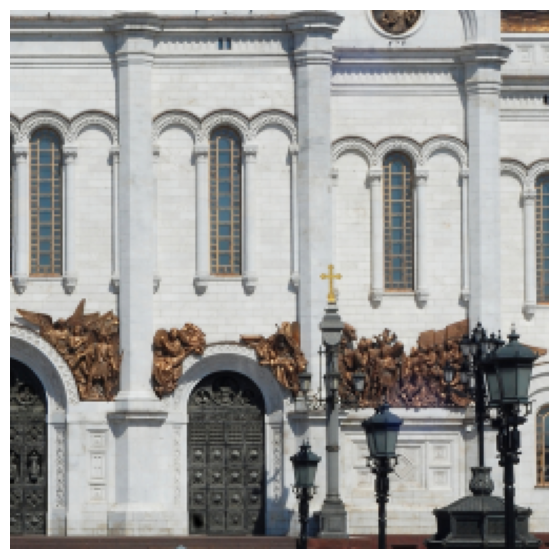

In [8]:
img = downsample_image(batch)[1]
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [9]:
img

tensor([[[0.8206, 0.8255, 0.8235,  ..., 0.3618, 0.3578, 0.2686],
         [0.8284, 0.8216, 0.8245,  ..., 0.1971, 0.1853, 0.2010],
         [0.6990, 0.7235, 0.7324,  ..., 0.3157, 0.3206, 0.2971],
         ...,
         [0.3108, 0.3235, 0.3069,  ..., 0.2627, 0.1412, 0.1186],
         [0.2716, 0.2824, 0.2755,  ..., 0.3157, 0.2137, 0.1422],
         [0.2784, 0.2804, 0.2765,  ..., 0.3255, 0.3275, 0.3324]],

        [[0.8275, 0.8412, 0.8412,  ..., 0.3216, 0.3176, 0.2441],
         [0.8353, 0.8304, 0.8422,  ..., 0.1755, 0.1608, 0.1755],
         [0.6912, 0.7245, 0.7373,  ..., 0.2578, 0.2510, 0.2382],
         ...,
         [0.2529, 0.2578, 0.2539,  ..., 0.1794, 0.0853, 0.0814],
         [0.2196, 0.2255, 0.2225,  ..., 0.1961, 0.1392, 0.0853],
         [0.2314, 0.2265, 0.2235,  ..., 0.1912, 0.2049, 0.2020]],

        [[0.8245, 0.8441, 0.8500,  ..., 0.3147, 0.3039, 0.2422],
         [0.8441, 0.8284, 0.8461,  ..., 0.1814, 0.1490, 0.1725],
         [0.6843, 0.7176, 0.7265,  ..., 0.2353, 0.2196, 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

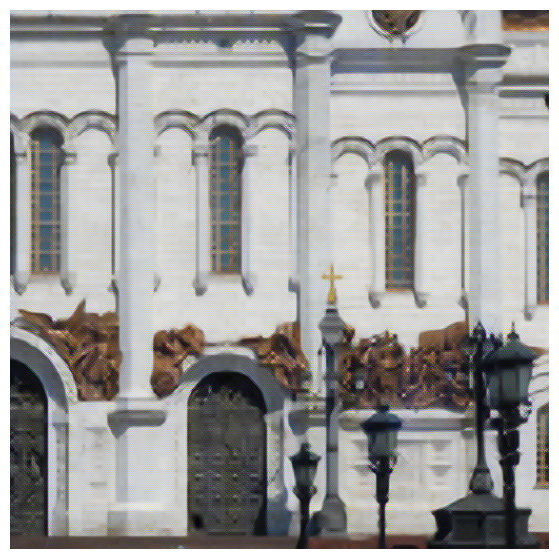

In [10]:
img = result[1].cpu()
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [11]:
result.shape

torch.Size([8, 3, 512, 512])

In [12]:
img.shape

torch.Size([3, 512, 512])

In [13]:
result[1]

tensor([[[0.8301, 0.7820, 0.7184,  ..., 0.1921, 0.2305, 0.1945],
         [0.5431, 0.9518, 0.7256,  ..., 0.3296, 0.2451, 0.2107],
         [0.8467, 0.6622, 0.7198,  ..., 0.1273, 0.2249, 0.3247],
         ...,
         [0.2421, 0.3482, 0.2772,  ..., 0.3168, 0.2438, 0.1967],
         [0.2855, 0.2911, 0.2566,  ..., 0.2004, 0.2007, 0.2594],
         [0.2672, 0.2635, 0.3043,  ..., 0.2244, 0.2719, 0.1995]],

        [[0.6990, 0.7411, 0.7689,  ..., 0.1903, 0.1724, 0.2020],
         [0.7494, 0.7515, 0.8713,  ..., 0.2257, 0.2312, 0.2091],
         [0.8122, 0.7099, 0.7599,  ..., 0.1374, 0.2245, 0.2079],
         ...,
         [0.2368, 0.2345, 0.2892,  ..., 0.1770, 0.1909, 0.1344],
         [0.2829, 0.2373, 0.2446,  ..., 0.1192, 0.1761, 0.1432],
         [0.2164, 0.2596, 0.2417,  ..., 0.2141, 0.1545, 0.1835]],

        [[0.7218, 0.8660, 0.8151,  ..., 0.2966, 0.2046, 0.1739],
         [0.9068, 0.6839, 0.6443,  ..., 0.0768, 0.1875, 0.1625],
         [0.6586, 0.8999, 0.8737,  ..., 0.3381, 0.1363, 0.

In [14]:
img1 = downsample_image(batch, factor=4)
img1.shape

torch.Size([8, 3, 128, 128])

In [15]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[ 8.1002e-02, -3.3948e-03,  1.0268e-01, -4.6040e-02,  2.1196e-02],
          [ 8.0319e-02,  1.1670e-01,  5.7700e-02, -5.7317e-02, -1.0756e-01],
          [-7.4933e-02, -1.0497e-01, -1.0711e-01,  5.9784e-02, -5.6496e-02],
          [ 4.0399e-03,  6.6607e-02,  9.2962e-02, -3.6680e-02, -4.6918e-02],
          [ 3.2164e-02,  5.3412e-03,  2.0965e-02, -9.1753e-02, -1.2344e-02]],

         [[-9.7877e-02,  2.2654e-03, -9.7802e-02,  4.1176e-02,  1.0414e-01],
          [-1.2331e-02,  1.3721e-01, -1.7287e-01,  8.2893e-02,  7.2407e-03],
          [ 4.5620e-02, -1.1806e-01, -2.5050e-01,  1.1794e-01,  7.3444e-02],
          [ 1.4916e-02, -3.4066e-02, -4.0587e-02, -2.8366e-02,  4.7207e-03],
          [ 4.3613e-02,  1.5871e-02,  9.1178e-02, -1.2460e-02,  1.0242e-02]],

         [[-4.7331e-02, -6.9748e-02, -3.5962e-02,  6.1064e-02,  1.8080e-02],
          [-6.3290e-02,  4.0909e-03,  2.0634e-02,  4.3756e-03,  7.6920e-02],
          [ 5.6439e-02,  1.8811e-02,  6.9991e-02, 

In [16]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [17]:
batch.shape, result.shape

(torch.Size([8, 3, 512, 512]), torch.Size([8, 3, 512, 512]))

In [18]:
loss = loss_fn(result, batch.to(device))
loss

tensor(92433.5391)

In [19]:
type(model)

residual_upsampler_2.ResidualUpsampler2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

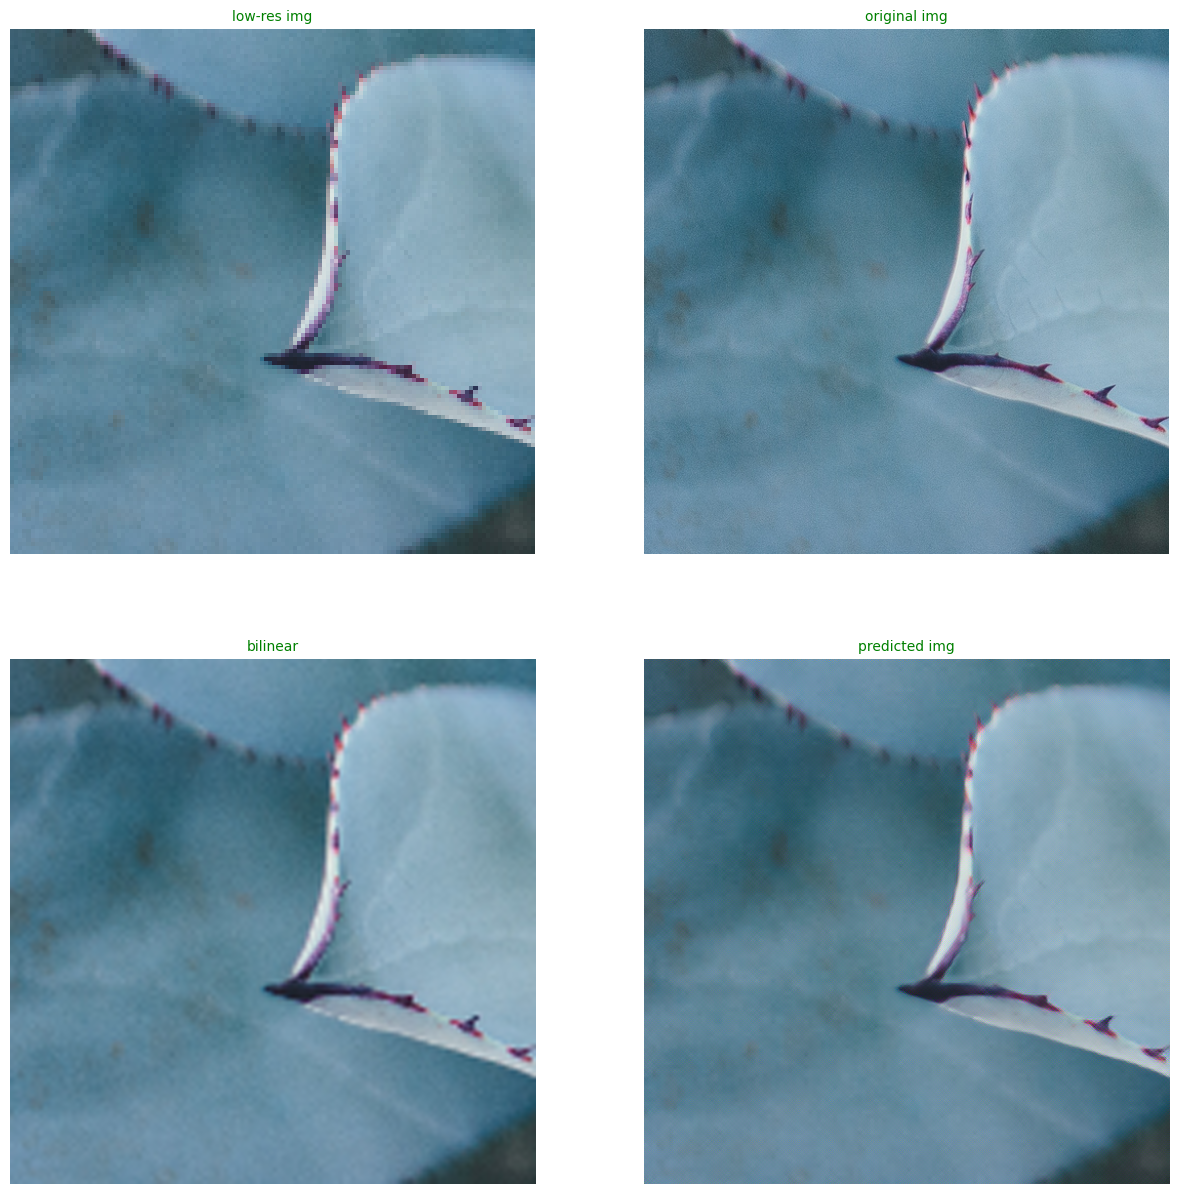

In [38]:
i = 6
y = batch[i]
y_pred = result[i]

upsample = nn.Upsample(scale_factor=4, mode="bicubic")

# Plot predictions
plt.figure(figsize=(15, 15))
nrows = 2
ncols = 2

plt.subplot(nrows, ncols, 1)
plt.imshow(downsample_image(y.unsqueeze(dim=0), factor=4).squeeze().permute(1, 2, 0))
plt.title("low-res img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 3)
plt.imshow(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)).squeeze().permute(1, 2, 0))
plt.title("bilinear", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 4)
plt.imshow(y_pred.permute(1, 2, 0))
plt.title("predicted img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 2)
plt.imshow(y.permute(1, 2, 0))
plt.title("original img", fontsize=10, c="g") # green text if correct
plt.axis(False)

In [21]:
from vgg_loss import VGGLoss
vgg_loss_fn = VGGLoss(device="cpu")


f:\Programms\deep_learning\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
f:\Programms\deep_learning\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
some_loss = vgg_loss_fn.forward_demo(batch[i])
some_loss.shape

torch.Size([512, 64, 64])

In [23]:
i=0
for param in vgg_loss_fn.vgg.parameters():
    print(param.shape)
    i+=1
i

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])


20

Original shape: torch.Size([64, 64]) -> [height, width]


(-0.5, 63.5, 63.5, -0.5)

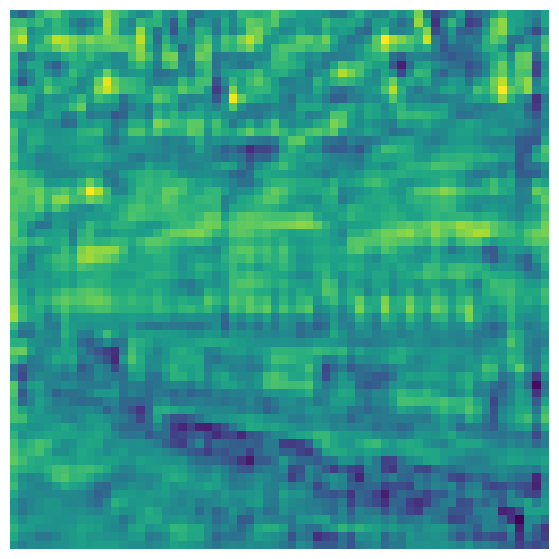

In [24]:
img = some_loss[11].cpu()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")

In [25]:
from collections import OrderedDict

import torch
from torch import nn, optim

from ignite.engine import *
from ignite.handlers import *
from ignite.metrics import *
from ignite.utils import *
from ignite.contrib.metrics.regression import *
from ignite.contrib.metrics import *

# create default evaluator for doctests

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)

# create default optimizer for doctests

param_tensor = torch.zeros([1], requires_grad=True)
default_optimizer = torch.optim.SGD([param_tensor], lr=0.1)

# create default trainer for doctests
# as handlers could be attached to the trainer,
# each test must define his own trainer using `.. testsetup:`

def get_default_trainer():

    def train_step(engine, batch):
        return batch

    return Engine(train_step)

# create default model for doctests

default_model = nn.Sequential(OrderedDict([
    ('base', nn.Linear(4, 2)),
    ('fc', nn.Linear(2, 1))
]))

#manual_seed(666)

test_y_pred = torch.randn((3,512,512))

from ignite.metrics import *
metric = SSIM(data_range=1.0)
metric.attach(default_evaluator, 'ssim')
state = default_evaluator.run([[y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0)]])
print(state.metrics['ssim'])
print(f"ssim loss = {torch.tensor((1 - state.metrics['ssim'])/2)}")

0.3123891080841194
ssim loss = 0.3438054323196411


In [26]:
# from custom_loss import SSIMLoss, VGGPerceptualLoss, SSIM, CombinedLoss

# ssim_loss_fn = SSIM(window_size=11,sigma=1.5)
# vgg_loss_fn = VGGPerceptualLoss()
# vgg_ssim_fn = CombinedLoss(loss_shift=1.0)
# ssim_loss_res = ssim_loss_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# vgg_loss_fn.to('cuda')
# vgg_loss_res = vgg_loss_fn(y_pred.unsqueeze(dim=0).to('cuda'), y.unsqueeze(dim=0).to('cuda'))
# true_loss_res = vgg_ssim_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# loss_res = vgg_loss_res + 1 * ssim_loss_res
# #vgg_loss_fn.to('cuda')
# for param in vgg_loss_fn.parameters():
#     print(param.device)
# ssim_loss_res, vgg_loss_res, loss_res, true_loss_res

In [27]:
import math

window_size = 11
sigma = 1.5
gauss = torch.Tensor([math.exp(-(x - window_size // 2) ** 2 / float(2 * sigma ** 2)) for x in range(window_size)])
window = gauss.unsqueeze(0) * gauss.unsqueeze(1)

In [28]:
gauss

tensor([0.0039, 0.0286, 0.1353, 0.4111, 0.8007, 1.0000, 0.8007, 0.4111, 0.1353,
        0.0286, 0.0039])

(-0.5, 10.5, 10.5, -0.5)

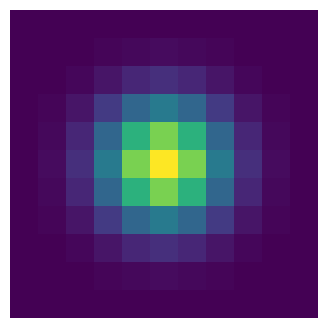

In [29]:
plt.figure(figsize=(4, 4))
plt.imshow(window)
plt.axis("off")

In [30]:
from train_statistics import TrainingStatisticsLogger
import os
print(os.getcwd())
logger = TrainingStatisticsLogger()
logger.load_from_json(filename='log/autoencoder_upsampler_res_blocks_2_test_log.json')
logger.ssim.__len__()

f:\Programms\deep_learning\diploma


160

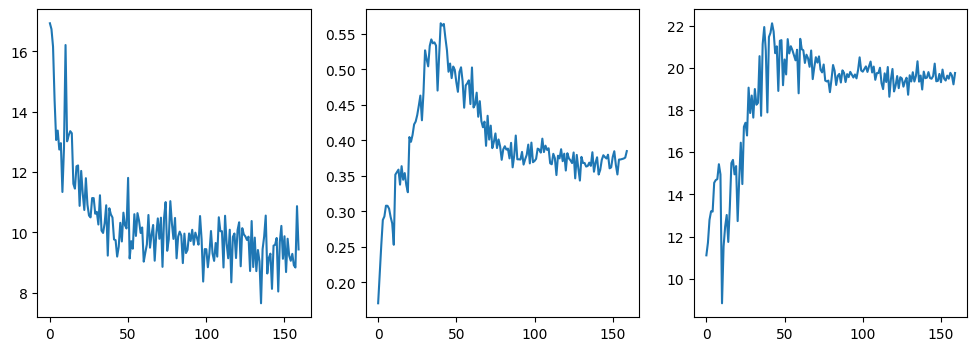

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.plot(logger.epoch_loss)
plt.subplot(1,3,2)
plt.plot(logger.ssim)
plt.subplot(1,3,3)
plt.plot(logger.psnr)

torch.Size([1, 128, 256, 256])
Original shape: torch.Size([256, 256]) -> [height, width]


(-0.5, 255.5, 255.5, -0.5)

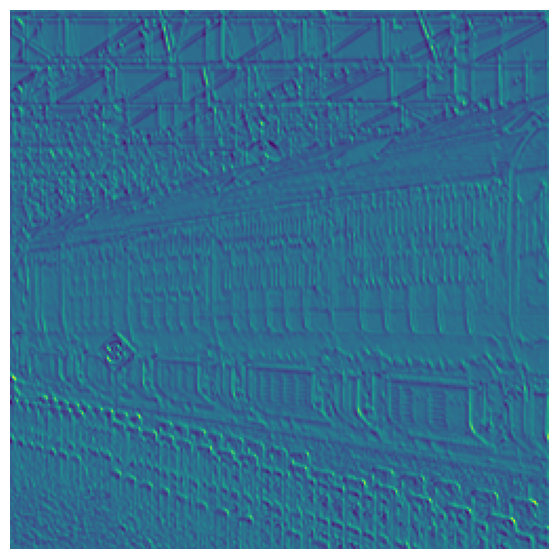

In [32]:
from custom_loss import VGG
vgg_loss = VGG('22')

sm_ls = vgg_loss.forward1(y.unsqueeze(0))
print(sm_ls.shape)
img = sm_ls[0][1].cpu().squeeze()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")

In [33]:
sm_ls = vgg_loss.forward(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)), y.unsqueeze(0))
sm_ls

tensor(22.0247)

In [34]:
from metrics import SSIM, PSNR


ssim = SSIM()
print(f'bilinear: {ssim(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)), y.unsqueeze(0))}')
print(f'bilinear: {ssim(y_pred.unsqueeze(dim=0), y.unsqueeze(0))}')

bilinear: 0.5956193208694458
bilinear: 0.3257347047328949
